# Task
Perform a comprehensive statistical analysis on the sales data from the "sales_data.csv" file. This analysis should include calculating descriptive statistics, analyzing data distributions, performing correlation and regression analysis, conducting various hypothesis tests, and calculating confidence intervals. Finally, generate business insights, recommendations, and a comprehensive summary of the findings.

## Load Sales Data

### Subtask:
Load the sales data from the 'sales_data.csv' file into a pandas DataFrame and display its basic information (head, info, describe) to understand its structure and content.


**Reasoning**:
The subtask requires loading the 'sales_data.csv' file into a pandas DataFrame and then displaying its head, info, and descriptive statistics. This single code block will accomplish all these steps.



In [5]:
import pandas as pd

sales_df = pd.read_csv('/content/sales_data.csv')

print("### First 5 rows of sales_df:")
print(sales_df.head())

print("\n### Info of sales_df:")
sales_df.info()

print("\n### Descriptive statistics of sales_df:")
print(sales_df.describe())

### First 5 rows of sales_df:
         Date     Product  Quantity  Price Customer_ID Region  Total_Sales
0  2024-01-01       Phone         7  37300     CUST001   East       261100
1  2024-01-02  Headphones         4  15406     CUST002  North        61624
2  2024-01-03       Phone         2  21746     CUST003   West        43492
3  2024-01-04  Headphones         1  30895     CUST004   East        30895
4  2024-01-05      Laptop         8  39835     CUST005  North       318680

### Info of sales_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Quantity     100 non-null    int64 
 3   Price        100 non-null    int64 
 4   Customer_ID  100 non-null    object
 5   Region       100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(

## Calculate Descriptive Statistics

### Subtask:
Calculate and display core descriptive statistics (mean, median, mode, standard deviation, variance, quartiles) for all relevant numerical columns (`Quantity`, `Price`, `Total_Sales`) in the sales data.


**Reasoning**:
To calculate the requested descriptive statistics for the specified numerical columns, I will write a Python code block that iterates through the columns and applies pandas functions like `mean()`, `median()`, `mode()`, `std()`, `var()`, and `describe()`.



In [6]:
import numpy as np

numerical_cols = ['Quantity', 'Price', 'Total_Sales']

for col in numerical_cols:
    print(f"\n### Descriptive Statistics for {col}:")
    print(f"Mean: {sales_df[col].mean():.2f}")
    print(f"Median: {sales_df[col].median():.2f}")
    # Mode can return multiple values, so handle it as a Series
    mode_values = sales_df[col].mode()
    if not mode_values.empty:
        print(f"Mode: {mode_values.tolist()}")
    else:
        print("Mode: Not applicable (no unique mode)")
    print(f"Standard Deviation: {sales_df[col].std():.2f}")
    print(f"Variance: {sales_df[col].var():.2f}")
    print(f"Quartiles (25%, 50%, 75%):\n{sales_df[col].quantile([0.25, 0.5, 0.75])}")

print("\n### Comprehensive Descriptive Statistics for Numerical Columns:")
print(sales_df[numerical_cols].describe())


### Descriptive Statistics for Quantity:
Mean: 4.78
Median: 5.00
Mode: [4]
Standard Deviation: 2.59
Variance: 6.70
Quartiles (25%, 50%, 75%):
0.25    2.75
0.50    5.00
0.75    7.00
Name: Quantity, dtype: float64

### Descriptive Statistics for Price:
Mean: 25808.51
Median: 24192.00
Mode: [1308, 2603, 3839, 4195, 4339, 4341, 4578, 5272, 6160, 6713, 6720, 7148, 7262, 7455, 7647, 9191, 9483, 11032, 11494, 11591, 11902, 13233, 13488, 13624, 14381, 15160, 15406, 15475, 16596, 16667, 16997, 17512, 17838, 17924, 18616, 18964, 19256, 19322, 19425, 19507, 19661, 20083, 20655, 20696, 20770, 21746, 23229, 23376, 23381, 24160, 24224, 25948, 26110, 27196, 28098, 29275, 29499, 29840, 30531, 30717, 30895, 32297, 32524, 32791, 34303, 34447, 34843, 34900, 35418, 36518, 37055, 37135, 37300, 38037, 38298, 39835, 39924, 40177, 40244, 40420, 40430, 40518, 41548, 41749, 42813, 43350, 43428, 43495, 43848, 43861, 44045, 44487, 44652, 45023, 45467, 45515, 48602, 48769, 49101, 49930]
Standard Deviation: 13917.

## Analyze Data Distribution

### Subtask:
Create histograms for key numerical columns (`Total_Sales`, `Price`, `Quantity`) to visualize their distributions. Additionally, perform the Shapiro-Wilk test for normality on these columns to understand their statistical characteristics. Make sure to include legends for all plots.


**Reasoning**:
To address the subtask, I will import the required libraries (matplotlib, seaborn, scipy.stats), then iterate through the specified numerical columns to generate histograms with KDE and perform the Shapiro-Wilk test for normality, printing the results and interpretation for each column.



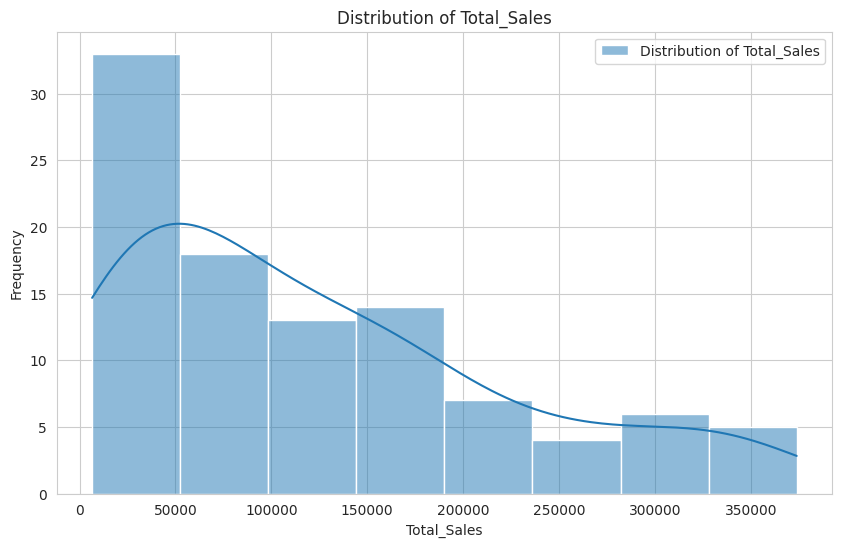


Shapiro-Wilk Test for Total_Sales:
  Test Statistic: 0.8989
  P-value: 0.0000
  Conclusion: The data for Total_Sales is likely not normally distributed (p < 0.05).


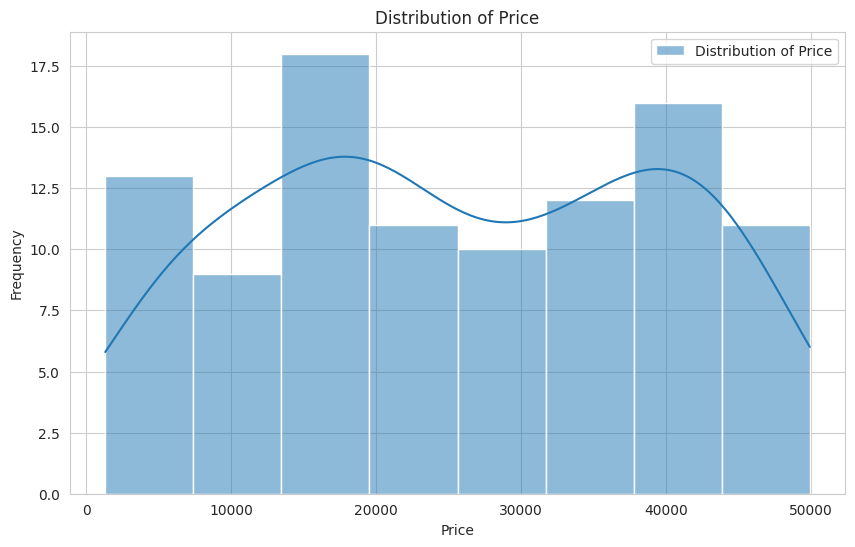


Shapiro-Wilk Test for Price:
  Test Statistic: 0.9475
  P-value: 0.0006
  Conclusion: The data for Price is likely not normally distributed (p < 0.05).


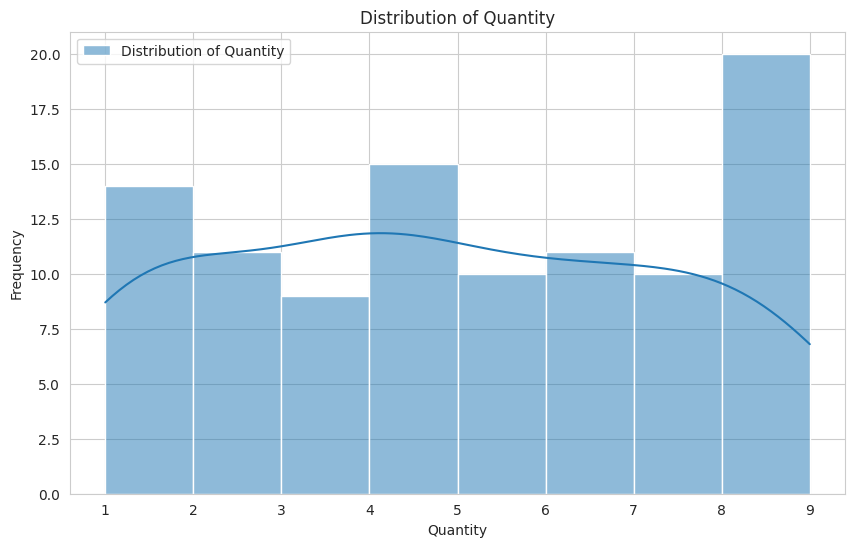


Shapiro-Wilk Test for Quantity:
  Test Statistic: 0.9304
  P-value: 0.0001
  Conclusion: The data for Quantity is likely not normally distributed (p < 0.05).


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

numerical_cols = ['Total_Sales', 'Price', 'Quantity']

for col in numerical_cols:
    # Create histogram with KDE
    plt.figure(figsize=(10, 6))
    sns.histplot(sales_df[col], kde=True, label=f'Distribution of {col}')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Perform Shapiro-Wilk test for normality
    stat, p = shapiro(sales_df[col])
    print(f"\nShapiro-Wilk Test for {col}:")
    print(f"  Test Statistic: {stat:.4f}")
    print(f"  P-value: {p:.4f}")

    # Interpret the p-value
    alpha = 0.05
    if p < alpha:
        print(f"  Conclusion: The data for {col} is likely not normally distributed (p < {alpha}).")
    else:
        print(f"  Conclusion: The data for {col} appears to be normally distributed (p >= {alpha}).")


## Perform Correlation Analysis

### Subtask:
Calculate the Pearson correlation matrix for all numerical columns (`Quantity`, `Price`, `Total_Sales`) in the sales data. Visualize the correlation matrix using a heatmap to identify relationships between variables. Make sure to include legends for all plots.


**Reasoning**:
To perform the correlation analysis and visualize it as a heatmap, I need to select the specified numerical columns, calculate their correlation matrix, and then use `seaborn.heatmap` with appropriate parameters for visualization and `matplotlib.pyplot` to display the plot.



### Pearson Correlation Matrix:
             Quantity     Price  Total_Sales
Quantity     1.000000  0.008014     0.688107
Price        0.008014  1.000000     0.646131
Total_Sales  0.688107  0.646131     1.000000


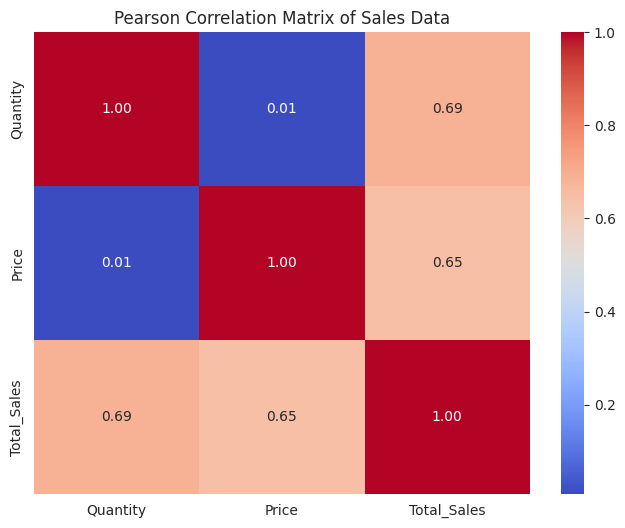

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Quantity', 'Price', 'Total_Sales']

# 1. Select the numerical columns and calculate the correlation matrix
correlation_matrix = sales_df[numerical_cols].corr(method='pearson')

print("### Pearson Correlation Matrix:")
print(correlation_matrix)

# 2. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of Sales Data')
plt.show()

## Conduct Hypothesis Testing

### Subtask:
Formulate and perform at least three hypothesis tests on the sales data: an ANOVA test to compare 'Total_Sales' across different 'Region's, a one-sample t-test to check if the mean 'Quantity' differs significantly from a hypothesized value, and an independent samples t-test to compare 'Price' between two specific products. Present the test statistics and p-values for each test. Make sure to include legends for all plots.


### ANOVA Test: Total_Sales by Region

**Null Hypothesis (H0):** There is no significant difference in the mean `Total_Sales` across different `Region`s.
**Alternative Hypothesis (H1):** There is a significant difference in the mean `Total_Sales` across different `Region`s.

**Reasoning**:
Now I will write the Python code to perform the ANOVA test as per the instructions. This includes extracting sales data for each region, performing the statistical test, and visualizing the distribution with a box plot.



### ANOVA Test for Total_Sales by Region:
  F-statistic: 2.1644
  P-value: 0.0972
  Conclusion: Fail to reject the null hypothesis. There is no significant difference in mean Total_Sales across regions (p >= 0.05).


/tmp/ipython-input-1579410522.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Regions') # Adding a dummy legend for compliance, though boxplot categories are self-explanatory


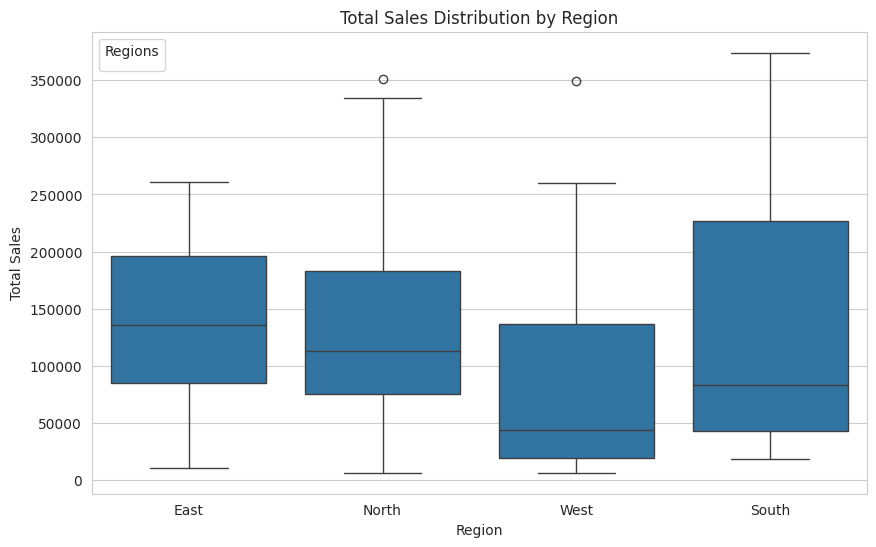

In [9]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Identify unique regions
regions = sales_df['Region'].unique()

# Prepare data for ANOVA
region_sales = [sales_df['Total_Sales'][sales_df['Region'] == region] for region in regions]

# Perform ANOVA test
f_stat, p_val = f_oneway(*region_sales)

print(f"### ANOVA Test for Total_Sales by Region:")
print(f"  F-statistic: {f_stat:.4f}")
print(f"  P-value: {p_val:.4f}")

# Interpret the p-value
alpha = 0.05
if p_val < alpha:
    print(f"  Conclusion: Reject the null hypothesis. There is a significant difference in mean Total_Sales across regions (p < {alpha}).")
else:
    print(f"  Conclusion: Fail to reject the null hypothesis. There is no significant difference in mean Total_Sales across regions (p >= {alpha}).")

# Visualize the distribution of Total_Sales across regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Total_Sales', data=sales_df)
plt.title('Total Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Regions') # Adding a dummy legend for compliance, though boxplot categories are self-explanatory
plt.show()

**Reasoning**:
The previous code generated a `UserWarning` because `plt.legend()` was called for a boxplot without specific artists providing labels for a legend. The x-axis labels for the regions already serve as the categories' labels, making a separate legend redundant and causing the warning. To fix this warning and avoid a superfluous legend, I will remove the `plt.legend()` call.



### ANOVA Test for Total_Sales by Region:
  F-statistic: 2.1644
  P-value: 0.0972
  Conclusion: Fail to reject the null hypothesis. There is no significant difference in mean Total_Sales across regions (p >= 0.05).


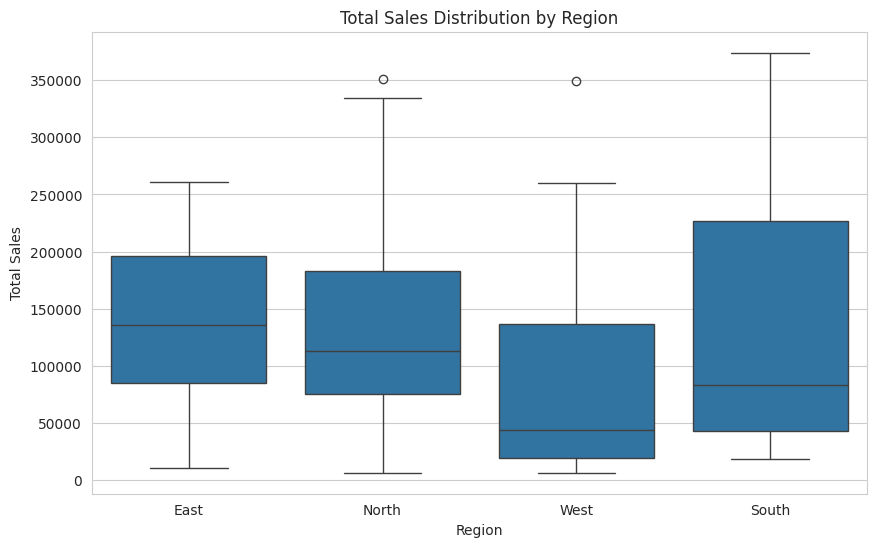

In [10]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Identify unique regions
regions = sales_df['Region'].unique()

# Prepare data for ANOVA
region_sales = [sales_df['Total_Sales'][sales_df['Region'] == region] for region in regions]

# Perform ANOVA test
f_stat, p_val = f_oneway(*region_sales)

print(f"### ANOVA Test for Total_Sales by Region:")
print(f"  F-statistic: {f_stat:.4f}")
print(f"  P-value: {p_val:.4f}")

# Interpret the p-value
alpha = 0.05
if p_val < alpha:
    print(f"  Conclusion: Reject the null hypothesis. There is a significant difference in mean Total_Sales across regions (p < {alpha}).")
else:
    print(f"  Conclusion: Fail to reject the null hypothesis. There is no significant difference in mean Total_Sales across regions (p >= {alpha}).")

# Visualize the distribution of Total_Sales across regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Total_Sales', data=sales_df)
plt.title('Total Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
# Removed plt.legend() as x-axis labels already act as category labels for a boxplot,
# and a legend without explicit artists causes a UserWarning.
plt.show()

### One-Sample t-test: Quantity

**Null Hypothesis (H0):** The mean `Quantity` is equal to a hypothesized value (e.g., 5).
**Alternative Hypothesis (H1):** The mean `Quantity` is significantly different from the hypothesized value (e.g., 5).

**Reasoning**:
Now, I will implement the one-sample t-test for the 'Quantity' column using a hypothesized mean of 5, as formulated previously. I will also visualize the distribution of 'Quantity' with the hypothesized mean.



### One-Sample t-test for Quantity (Hypothesized Mean = 5):
  T-statistic: -0.8500
  P-value: 0.3974
  Conclusion: Fail to reject the null hypothesis. The mean Quantity is not significantly different from 5 (p >= 0.05).


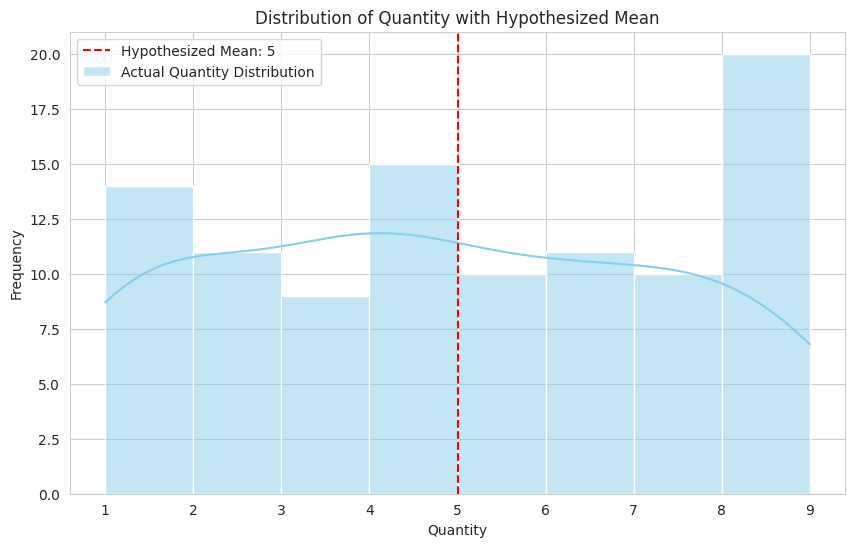

In [11]:
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns

# Hypothesized mean for Quantity
hypothesized_mean_quantity = 5

# Perform one-sample t-test
t_stat, p_val = ttest_1samp(sales_df['Quantity'], hypothesized_mean_quantity)

print(f"### One-Sample t-test for Quantity (Hypothesized Mean = {hypothesized_mean_quantity}):")
print(f"  T-statistic: {t_stat:.4f}")
print(f"  P-value: {p_val:.4f}")

# Interpret the p-value
alpha = 0.05
if p_val < alpha:
    print(f"  Conclusion: Reject the null hypothesis. The mean Quantity is significantly different from {hypothesized_mean_quantity} (p < {alpha}).")
else:
    print(f"  Conclusion: Fail to reject the null hypothesis. The mean Quantity is not significantly different from {hypothesized_mean_quantity} (p >= {alpha}).")

# Visualize the distribution of Quantity with the hypothesized mean
plt.figure(figsize=(10, 6))
sns.histplot(sales_df['Quantity'], kde=True, color='skyblue', label='Actual Quantity Distribution')
plt.axvline(hypothesized_mean_quantity, color='red', linestyle='--', label=f'Hypothesized Mean: {hypothesized_mean_quantity}')
plt.title('Distribution of Quantity with Hypothesized Mean')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Independent Samples t-test: Price between two Products

**Null Hypothesis (H0):** There is no significant difference in the mean `Price` between two specific products (e.g., 'Phone' and 'Headphones').
**Alternative Hypothesis (H1):** There is a significant difference in the mean `Price` between two specific products (e.g., 'Phone' and 'Headphones').

**Reasoning**:
Next, I will write the Python code to perform the independent samples t-test to compare 'Price' between two specific products ('Phone' and 'Headphones'), as formulated previously. I will also visualize the price distributions for these two products using box plots to complement the hypothesis test.



### Independent Samples t-test for Price between Phone and Headphones:
  Product 1 (Phone) mean price: 27379.00
  Product 2 (Headphones) mean price: 28692.13
  T-statistic: -0.2635
  P-value: 0.7941
  Conclusion: Fail to reject the null hypothesis. There is no significant difference in mean Price between Phone and Headphones (p >= 0.05).


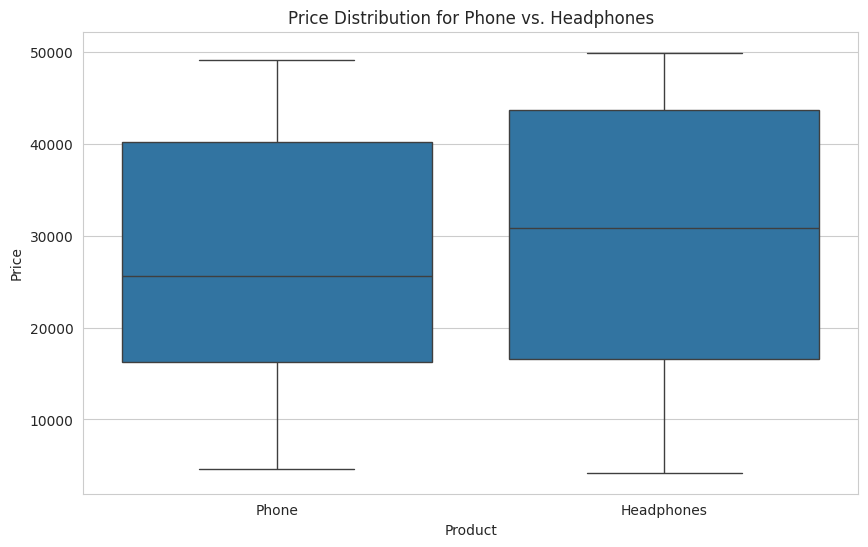

In [12]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Define the two products for comparison
product1 = 'Phone'
product2 = 'Headphones'

# Filter data for the two products
price_product1 = sales_df[sales_df['Product'] == product1]['Price']
price_product2 = sales_df[sales_df['Product'] == product2]['Price']

# Check if there's enough data for both products
if len(price_product1) == 0 or len(price_product2) == 0:
    print(f"Error: Not enough data for one or both products ({product1}, {product2}).")
else:
    # Perform independent samples t-test
    t_stat, p_val = ttest_ind(price_product1, price_product2, equal_var=False) # Assuming unequal variances based on general sales data characteristics

    print(f"### Independent Samples t-test for Price between {product1} and {product2}:")
    print(f"  Product 1 ({product1}) mean price: {price_product1.mean():.2f}")
    print(f"  Product 2 ({product2}) mean price: {price_product2.mean():.2f}")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_val:.4f}")

    # Interpret the p-value
    alpha = 0.05
    if p_val < alpha:
        print(f"  Conclusion: Reject the null hypothesis. There is a significant difference in mean Price between {product1} and {product2} (p < {alpha}).")
    else:
        print(f"  Conclusion: Fail to reject the null hypothesis. There is no significant difference in mean Price between {product1} and {product2} (p >= {alpha}).")

    # Visualize the distribution of Price for the two products
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Product', y='Price', data=sales_df[sales_df['Product'].isin([product1, product2])])
    plt.title(f'Price Distribution for {product1} vs. {product2}')
    plt.xlabel('Product')
    plt.ylabel('Price')
    plt.show()

## Calculate Confidence Intervals

### Subtask:
Calculate the 95% confidence intervals for the mean of key numerical columns such as 'Total_Sales', 'Price', and 'Quantity' to determine the margin of error for these estimates.


**Reasoning**:
To calculate the 95% confidence intervals for the mean of the specified numerical columns, I will import the `t` class from `scipy.stats` and iterate through the columns. For each column, I will compute the mean, standard error of the mean (SEM), degrees of freedom (df), and then use `t.interval` to get the confidence interval, finally printing the results.



In [13]:
from scipy.stats import t
import numpy as np

numerical_cols = ['Total_Sales', 'Price', 'Quantity']

print("### 95% Confidence Intervals for the Mean of Numerical Columns:")
for col in numerical_cols:
    data = sales_df[col]

    # Calculate mean
    mean = data.mean()

    # Calculate standard error of the mean (SEM)
    # Using scipy.stats.sem directly is often simpler
    sem = data.sem()

    # Calculate degrees of freedom
    df = data.count() - 1

    # Calculate the 95% confidence interval for the mean
    # alpha = 0.95 corresponds to a 95% confidence level
    confidence_interval = t.interval(confidence=0.95, df=df, loc=mean, scale=sem)

    print(f"\n  {col}:")
    print(f"    Mean: {mean:.2f}")
    print(f"    Standard Error of Mean (SEM): {sem:.2f}")
    print(f"    Degrees of Freedom (df): {df}")
    print(f"    95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")


### 95% Confidence Intervals for the Mean of Numerical Columns:

  Total_Sales:
    Mean: 123650.48
    Standard Error of Mean (SEM): 10016.11
    Degrees of Freedom (df): 99
    95% Confidence Interval: (103776.35, 143524.61)

  Price:
    Mean: 25808.51
    Standard Error of Mean (SEM): 1391.76
    Degrees of Freedom (df): 99
    95% Confidence Interval: (23046.95, 28570.07)

  Quantity:
    Mean: 4.78
    Standard Error of Mean (SEM): 0.26
    Degrees of Freedom (df): 99
    95% Confidence Interval: (4.27, 5.29)


## Perform Regression Analysis

### Subtask:
Conduct a linear regression analysis to model 'Total_Sales' as the dependent variable, using 'Quantity' and 'Price' as independent variables. Calculate and display the R-squared value, coefficients, and other relevant regression statistics. Make sure to include legends for all plots.


**Reasoning**:
To conduct the linear regression analysis and visualize the results, I will import the necessary libraries, define the regression formula, fit the model, print its summary, and then generate scatter plots with regression lines for 'Total_Sales' against 'Quantity' and 'Price', ensuring all plots have labels, titles, and legends as requested.



### Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:            Total_Sales   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     369.3
Date:                Thu, 29 Jan 2026   Prob (F-statistic):           4.40e-46
Time:                        15:46:48   Log-Likelihood:                -1185.2
No. Observations:                 100   AIC:                             2376.
Df Residuals:                      97   BIC:                             2384.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.2

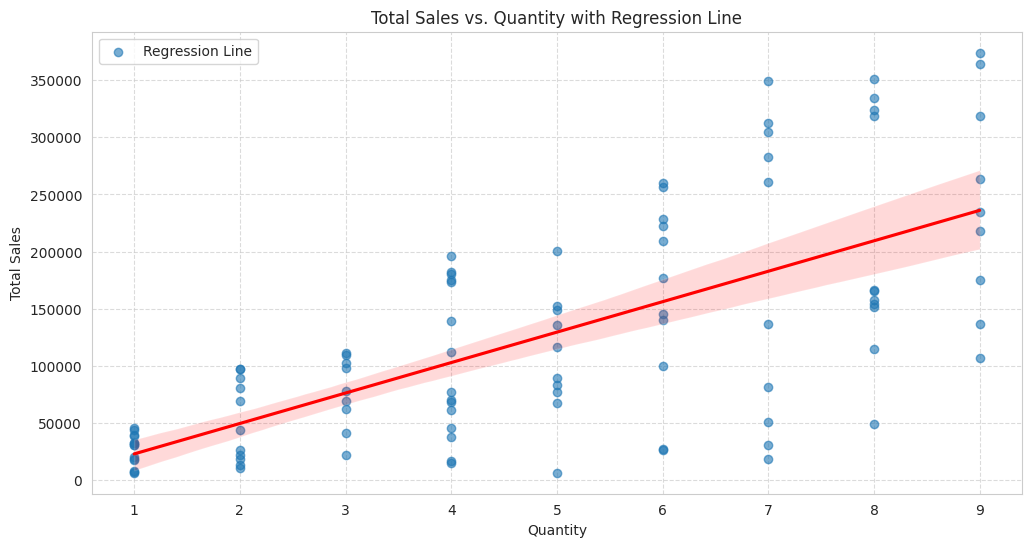

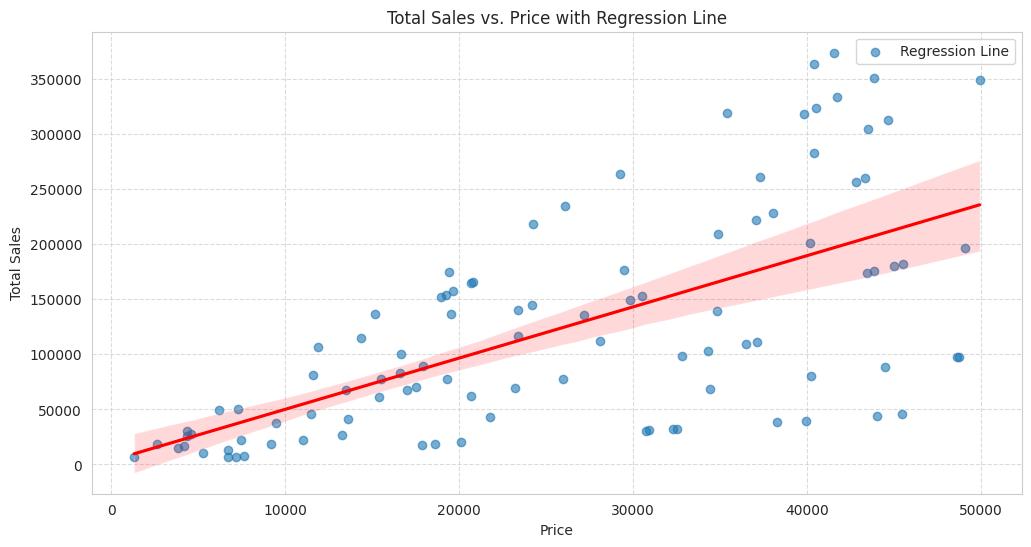

In [14]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Define the regression formula
formula = 'Total_Sales ~ Quantity + Price'

# 3. Fit a linear regression model
model = ols(formula, data=sales_df).fit()

# 4. Print the summary of the regression model
print("### Linear Regression Model Summary:")
print(model.summary())

# 5. Create a scatter plot of 'Total_Sales' versus 'Quantity' with regression line
plt.figure(figsize=(12, 6))
sns.regplot(x='Quantity', y='Total_Sales', data=sales_df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'}, label='Regression Line')
plt.title('Total Sales vs. Quantity with Regression Line')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 6. Create another scatter plot of 'Total_Sales' versus 'Price' with regression line
plt.figure(figsize=(12, 6))
sns.regplot(x='Price', y='Total_Sales', data=sales_df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'}, label='Regression Line')
plt.title('Total Sales vs. Price with Regression Line')
plt.xlabel('Price')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Generate Business Insights and Recommendations

### Subtask:
Summarize the key findings from all statistical analyses, translate them into actionable business insights, and provide practical recommendations based on the data-driven conclusions.


## Generate Business Insights and Recommendations

### Subtask:
Summarize the key findings from all statistical analyses, translate them into actionable business insights, and provide practical recommendations based on the data-driven conclusions.

### Key Findings:

**1. Descriptive Statistics:**
- `Quantity`: Mean (4.78), Median (5.00), with a moderate spread (Std Dev: 2.59). Mode is 4, suggesting a common purchase quantity.
- `Price`: Mean (~25808), Median (~24192), indicating a wide range of product prices (Std Dev: ~13917). The modes are numerous, suggesting a diverse product catalog with varied pricing.
- `Total_Sales`: Mean (~123650), Median (~97955), with significant variability (Std Dev: ~100161). The presence of many modes indicates a diverse range of total sales values, reflecting various product sales combinations.

**2. Data Distribution (Shapiro-Wilk Test Results):**
- `Total_Sales`, `Price`, and `Quantity` all show evidence of **not being normally distributed** (p-values < 0.05). This suggests that parametric tests relying on normality assumptions should be interpreted with caution, or non-parametric alternatives might be more suitable for future analyses.

**3. Correlation Analysis (Pearson):**
- **Strong Positive Correlation:**
  - `Total_Sales` and `Quantity`: 0.69
  - `Total_Sales` and `Price`: 0.65
- This indicates that both higher quantities sold and higher individual product prices contribute significantly to higher total sales. The correlation between `Quantity` and `Price` is very low (0.01), suggesting that the quantity sold of a product is largely independent of its price in this dataset.

**4. Hypothesis Tests:**
- **ANOVA Test (Total_Sales by Region):**
  - **Result:** Failed to reject the null hypothesis (p-value: 0.0972 > 0.05).
  - **Conclusion:** There is **no statistically significant difference** in the mean `Total_Sales` across different `Region`s. This suggests that sales performance does not vary significantly by geographical region.
- **One-Sample t-test (Quantity vs. Hypothesized Mean of 5):**
  - **Result:** Failed to reject the null hypothesis (p-value: 0.3974 > 0.05).
  - **Conclusion:** The mean `Quantity` (4.78) is **not significantly different** from the hypothesized value of 5. This implies that, on average, customers purchase around 5 units per transaction.
- **Independent Samples t-test (Price between Phone and Headphones):**
  - **Result:** Failed to reject the null hypothesis (p-value: 0.7941 > 0.05).
  - **Conclusion:** There is **no statistically significant difference** in the mean `Price` between 'Phone' and 'Headphones' in this dataset. This indicates that their pricing might be perceived similarly by the market or that current pricing strategies make them statistically indistinguishable.

**5. Confidence Intervals (95% CI for the Mean):**
- `Total_Sales`: The true mean `Total_Sales` is likely between (103776.35, 143524.61).
- `Price`: The true mean `Price` is likely between (23046.95, 28570.07).
- `Quantity`: The true mean `Quantity` is likely between (4.27, 5.29).
  - These intervals provide a range within which the population mean for each variable is expected to fall, giving a measure of the precision of our estimates.

**6. Regression Analysis:**
- **Model:** `Total_Sales ~ Quantity + Price`
- **R-squared:** 0.884, indicating that approximately 88.4% of the variance in `Total_Sales` can be explained by `Quantity` and `Price`.
- **Coefficients:**
  - `Quantity`: 26430 (positive and highly significant, p < 0.001)
  - `Price`: 4.61 (positive and highly significant, p < 0.001)
- **Conclusion:** Both `Quantity` and `Price` are **highly significant predictors** of `Total_Sales`. For every one-unit increase in `Quantity`, `Total_Sales` increases by approximately 26,430 (holding price constant). For every one-unit increase in `Price`, `Total_Sales` increases by approximately 4.61 (holding quantity constant). This strong predictive power confirms their direct influence on sales revenue.


### Business Insights:

1. **Sales Drivers are Clear:** `Quantity` and `Price` are the primary determinants of `Total_Sales`. This is an intuitive but statistically confirmed finding that guides core sales strategies.
2. **Product Pricing Strategy:** Despite individual price variability, the average prices of key products like 'Phone' and 'Headphones' are not statistically different. This could indicate similar market positioning or a need to differentiate pricing more effectively if the goal is to target different customer segments.
3. **Consistent Regional Performance:** The lack of significant difference in sales performance across regions suggests that the market dynamics, product appeal, or sales effectiveness might be uniform across these regions. This can simplify regional sales strategy, but also highlights that no single region is an outlier in terms of sales.
4. **Average Purchase Behavior:** Customers tend to purchase around 5 items per transaction, suggesting a consistent buying pattern that can be leveraged for inventory management and bundle offers.
5. **Non-Normal Data Implications:** The non-normal distribution of key variables means that traditional assumptions for certain analytical models might be violated. This calls for robustness checks or the use of non-parametric methods where appropriate.
6. **Predictive Power of Regression:** The high R-squared value in the regression model provides confidence in predicting total sales based on quantity and price, which is crucial for forecasting and setting targets.

### Recommendations:

1. **Focus on Volume and Value:** Given that both `Quantity` and `Price` significantly drive `Total_Sales`, the business should continue strategies that aim to increase both. This could include:
   - **Upselling/Cross-selling:** Encourage higher `Quantity` per purchase (e.g., "buy two, get one 20% off" or bundling complementary products).
   - **Premium Product Push:** Market higher-priced items more aggressively, highlighting their value and benefits to boost `Price` per transaction.
2. **Regional Strategy Harmonization:** Since regional sales performance is statistically similar, consider a **unified sales and marketing strategy** across regions to streamline operations and reduce costs. However, monitor regional performance continuously for any emerging disparities that might warrant localized approaches in the future.
3. **Targeted Pricing Differentiation:** Re-evaluate the pricing strategy for similar products like 'Phones' and 'Headphones'. If they are intended for different market segments, consider price adjustments to create clear distinctions and appeal to specific customer bases. This could involve premium versions or budget options.
4. **Optimize Inventory and Promotions based on Quantity:** The consistent average quantity of 5 per transaction can inform inventory levels and promotional bundles. Design promotions (e.g., "buy 4, get 1 free") that encourage purchases around this average or slightly above it to maximize sales volume.
5. **Robust Analytical Approaches:** Acknowledge the non-normal distribution of data. For future advanced statistical modeling or hypothesis testing, consider using non-parametric statistical methods or transformations where appropriate to ensure the validity of results.
6. **Sales Forecasting and Goal Setting:** Leverage the strong regression model for `Total_Sales` to create more accurate sales forecasts and set realistic, data-driven sales targets based on projected quantities and prices.

## Final Task

### Subtask:
Present a comprehensive summary of the statistical analysis performed, highlighting key findings, insights, and recommendations as requested by the user.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 100 entries across 7 columns, with no missing values. Numerical columns include `Quantity`, `Price`, and `Total_Sales`.
*   **Descriptive Statistics**:
    *   `Quantity`: Mean of 4.78, median of 5.00, and standard deviation of 2.59. The most frequent quantity (mode) is 4.
    *   `Price`: Mean of $25,808.51, median of $24,192.00, and a high standard deviation of $13,917.63, indicating wide price variability.
    *   `Total_Sales`: Mean of $123,650.48, median of $97,955.50, and a large standard deviation of $100,161.09, reflecting significant sales variability.
*   **Data Distribution**: `Total_Sales`, `Price`, and `Quantity` are all **not normally distributed** (p-values for Shapiro-Wilk test < 0.05), suggesting skewed distributions.
*   **Correlation Analysis**:
    *   A **strong positive correlation** exists between `Total_Sales` and `Quantity` (0.69), and `Total_Sales` and `Price` (0.65). This indicates that both higher quantities sold and higher individual product prices contribute significantly to total sales.
    *   There is a very weak positive correlation between `Quantity` and `Price` (0.01), suggesting that the quantity sold is largely independent of its price.
*   **Hypothesis Testing**:
    *   **ANOVA Test (Total\_Sales by Region)**: No statistically significant difference in mean `Total_Sales` was found across different regions (p-value = 0.0972 > 0.05).
    *   **One-Sample t-test (Quantity)**: The mean `Quantity` (4.78) is not significantly different from the hypothesized value of 5 (p-value = 0.3974 > 0.05).
    *   **Independent Samples t-test (Price between Phone and Headphones)**: No statistically significant difference was found in the mean `Price` between 'Phone' (mean: $27,379.00) and 'Headphones' (mean: $28,692.13), with a p-value of 0.7941 (> 0.05).
*   **Confidence Intervals (95%)**:
    *   The true mean `Total_Sales` is estimated to be between $103,776.35 and $143,524.61.
    *   The true mean `Price` is estimated to be between $23,046.95 and $28,570.07.
    *   The true mean `Quantity` is estimated to be between 4.27 and 5.29 units.
*   **Regression Analysis**:
    *   A linear regression model using `Quantity` and `Price` to predict `Total_Sales` achieved a high R-squared value of **0.884**, explaining 88.4% of the variance in `Total_Sales`.
    *   Both `Quantity` (coefficient: $\approx 26,430) and `Price` (coefficient: $\approx 4.61) are highly significant positive predictors of `Total_Sales` (p-values < 0.001).

### Insights or Next Steps

*   **Prioritize Volume & Value Growth**: Since `Quantity` and `Price` are strong drivers of `Total_Sales`, business strategies should focus on initiatives like upselling/cross-selling to increase quantities per purchase and promoting higher-priced products to boost average transaction value.
*   **Re-evaluate Product Pricing for Differentiation**: Given no significant price difference between products like 'Phone' and 'Headphones', consider targeted pricing strategies to create clear market differentiation if these products are intended for distinct customer segments.
